In [2]:
import os
import math
import copy
import numpy as np 
import pandas as pd
import nibabel as nib
import nibabel.processing
from pyecharts import Pie, Bar
import matplotlib.pyplot as plt



In [2]:
csv_list = ['demographic/' + each for each in os.listdir('demographic') if each.endswith('csv')]
data_frame_list = []
for each in csv_list:
    temp_data_frame = pd.read_csv(each)
    data_frame_list.append(temp_data_frame)
data_frame = pd.concat(data_frame_list)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
count_chart = data_frame.groupby('gender').count()
count_chart.index = ['female', 'male']
pie = Pie('Demographics Overview', title_pos='center')
pie.add('',count_chart['origin'].index,count_chart.values,
        is_label_show=True,
        legend_orient="vertical",
        is_legend_show=True,legend_pos="left")

In [4]:
count_chart = data_frame.groupby('origin').count()

In [5]:
num = len(data_frame)
pie = Pie(f'Data origin overview, Total number={num}', title_pos='center', width='900px',height='600px')
pie.add('',count_chart['age'].index,count_chart.values,
        is_label_show=True,
        legend_orient="vertical",
        is_legend_show=True,legend_pos="left")

In [6]:
age_groups = pd.cut(data_frame['age'], bins=range(10,90,10))
describe_age = data_frame.groupby(age_groups).size()
bar = Bar(f'Data origin overview, Total number={num}', title_pos='center', width='1000px',height='500px')
bar.add('',[str(each) for each in describe_age.index],describe_age.values,
        is_label_show=True,
        legend_orient="vertical",
        xaxis_name='Age',
        yaxis_name='Count',
        is_legend_show=True,legend_pos="left")

In [7]:
def show_origin_image(name,s=100,max_limit=None, min_limit=None):
    origin = name
    file_name_list = [each for each in os.listdir('registration/' + origin) if not each.startswith('.')]
    file_name_list = file_name_list[min_limit:max_limit]
    dimension = 2
    width_num = 6
    height_num = math.ceil(len(file_name_list) / width_num)
    plt.figure(figsize=(15, height_num * 2.8))
    data_list = []
    for n,each in enumerate(file_name_list, 1):
        agent = nib.load(os.path.join('registration',origin, each), keep_file_open=False)
        three_d_data = np.asarray(agent.dataobj)
        size = three_d_data.shape
        image = np.take(three_d_data, s, dimension)
        plt.subplot(height_num, width_num, n)
        plt.imshow(image, 'gray')
        plt.axis('off')
        data_list.append(three_d_data)
        del agent
    return data_list

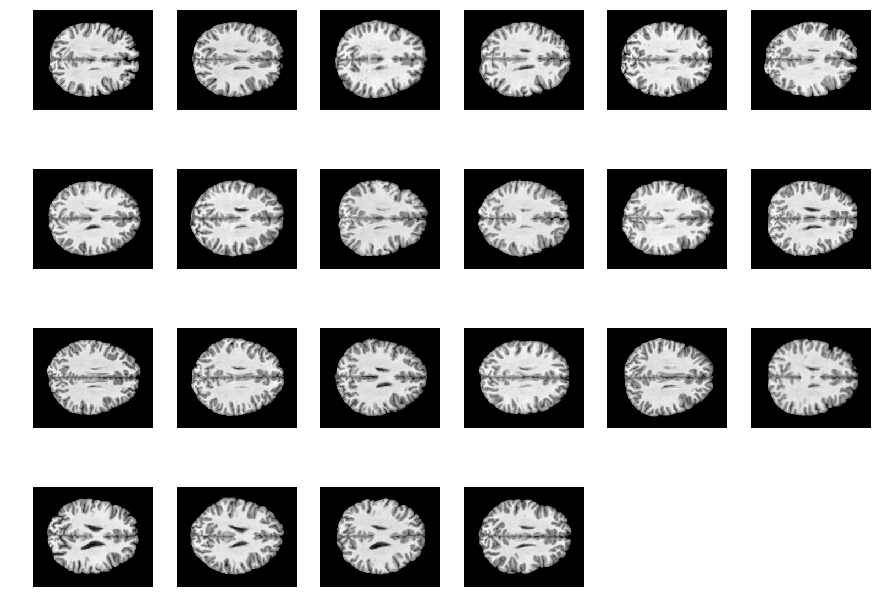

In [8]:
oxford = show_origin_image('Oxford')

Text(0.5, 1.0, 'Histogram for a brain image')

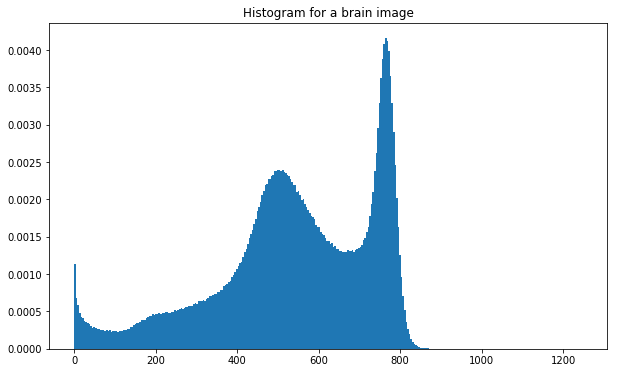

In [9]:
plt.figure(figsize=(10,6))
output = plt.hist(oxford[5][(oxford[5] > 0)], density=True, bins=320)
plt.title('Histogram for a brain image')

Text(0.5, 1.0, 'White matter')

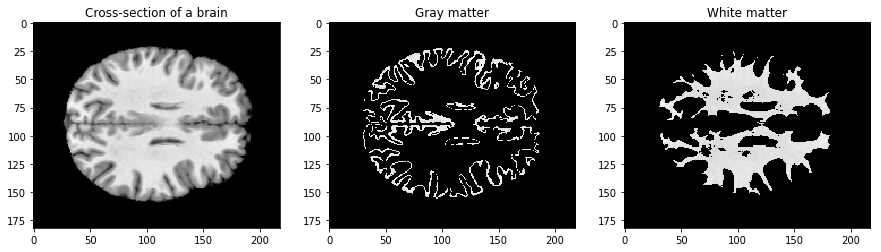

In [22]:
trail = oxford[1]
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.take(trail, 100, 2), 'gray')
plt.title('Cross-section of a brain')
gray_matter = copy.deepcopy(trail)
gray_matter[gray_matter<420] = 0
gray_matter[gray_matter>500] = 0
image = np.take(gray_matter, 100, 2)
plt.subplot(1,3,2)
plt.imshow(image, 'gray')
plt.title('Gray matter')
white_matter = copy.deepcopy(trail)
white_matter[white_matter<620] = 0
white_matter[white_matter>800] = 0
image = np.take(white_matter, 100, 2)
plt.subplot(1,3,3)
plt.imshow(image, 'gray')
plt.title('White matter')

In [11]:
directories = [each for each in os.listdir('registration') if '.' not in each]
latex_code = ''
for directory in directories:
    file_names = [each for each in os.listdir(os.path.join('registration', directory)) if each.endswith('.gz')]
    age_set = []
    line = ''
    gender_set = {'m':0, 'f':0}
    for file_name in file_names:
        name = file_name.split('.')[0]
        try:
            frame = data_frame.loc[(data_frame.origin==directory) & (data_frame.name==name)]
            age = frame.age.values[0]
            gender = frame.gender.values[0]
            age_set.append(age)
            gender_set[gender]+=1
        except:
            continue
    avg_age = np.average(age_set)
    min_age = np.min(age_set)
    max_age = np.max(age_set)
    std = np.std(age_set)
    N = len(age_set)
    line = f"{directory} & {N} & {round(avg_age,2)}({round(std,2)}) & {round(min_age,2)}-{round(max_age,2)} & {gender_set['m']}/{gender_set['f']} & INDI\\\ \n"
    latex_code += line
print(latex_code)

Beijing & 198 & 21.16(1.82) & 18.0-26.0 & 76/122 & INDI\\ 
Atlanta & 28 & 30.89(9.72) & 22.0-57.0 & 13/15 & INDI\\ 
NewYork & 104 & 25.41(10.17) & 7.88-49.16 & 51/53 & INDI\\ 
Queensland & 19 & 25.95(3.78) & 20.0-34.0 & 11/8 & INDI\\ 
ICBM & 86 & 44.19(17.81) & 19.0-85.0 & 41/45 & INDI\\ 
Oulu & 103 & 21.52(0.57) & 20.0-23.0 & 37/66 & INDI\\ 
Cambridge & 198 & 21.03(2.3) & 18.0-30.0 & 75/123 & INDI\\ 
Oxford & 22 & 29.0(3.71) & 20.0-35.0 & 12/10 & INDI\\ 
PaloAlto & 17 & 32.47(7.87) & 22.0-46.0 & 2/15 & INDI\\ 
Dallas & 24 & 42.62(19.65) & 20.0-71.0 & 12/12 & INDI\\ 
NewHaven & 35 & 29.11(8.72) & 18.0-48.0 & 18/17 & INDI\\ 
Baltimore & 23 & 29.26(5.34) & 20.0-40.0 & 8/15 & INDI\\ 
AnnArbor & 60 & 36.22(23.97) & 13.41-80.0 & 38/22 & INDI\\ 
Leipzig & 37 & 26.22(4.94) & 20.0-42.0 & 16/21 & INDI\\ 
SaintLouis & 31 & 25.1(2.28) & 21.0-29.0 & 14/17 & INDI\\ 
Bangor & 20 & 23.4(5.18) & 19.0-38.0 & 20/0 & INDI\\ 
IXI & 563 & 48.65(16.46) & 19.98-86.32 & 250/313 & INDI\\ 
Pittsburgh & 17 & 37.

In [12]:
directories = [each for each in os.listdir('raw') if '.' not in each]
for directory in directories:
    file_names = [each for each in os.listdir(os.path.join('raw', directory)) if each.endswith('.nii')]
    for file_name in file_names:
        full_name = os.path.join('raw', directory, file_name)
        agent = nib.load(full_name)
        dim = [str(round(each,2)) for each in list(dict(agent.header)['pixdim'][1:4])]
        print(directory,' & ', 'x'.join(dim), r'\\')

Atlanta  &  1.0x1.0x1.0 \\
NewYork  &  0.9x0.94x0.94 \\
Queensland  &  0.94x0.9x0.94 \\
ICBM  &  1.0x1.0x1.0 \\
Oulu  &  0.94x0.94x1.0 \\
Cambridge  &  1.2x1.2x1.2 \\
Oxford  &  1.0x1.0x1.0 \\
PaloAlto  &  0.86x1.5x0.86 \\
Dallas  &  1.0x1.0x1.0 \\
NewHaven  &  1.0x1.0x1.0 \\
Berlin_Margulies  &  1.0x1.0x1.0 \\
Baltimore  &  1.0x1.0x1.0 \\
AnnArbor  &  1.0x1.0x1.2 \\
Leipzig  &  1.0x1.0x1.0 \\
SaintLouis  &  1.0x1.0x1.0 \\
Bangor  &  1.0x1.0x1.0 \\
IXI  &  0.94x0.94x1.2 \\
Pittsburgh  &  0.78x0.78x0.78 \\
Leiden  &  0.88x0.88x1.2 \\
Orangeburg  &  1.0x1.0x1.0 \\


In [13]:
dict(agent.header)['pixdim'][1:4]

array([1., 1., 1.], dtype=float32)

In [14]:
import pyecharts

In [15]:
pyecharts.__version__

'0.5.11'

In [23]:
file_path = 'training_set/GMM/X/0.nii.gz'
agent = nib.load(file_path)

In [26]:
data = np.array(agent.dataobj)

Text(0.5, 1.0, 'Histogram For A Brain Image')

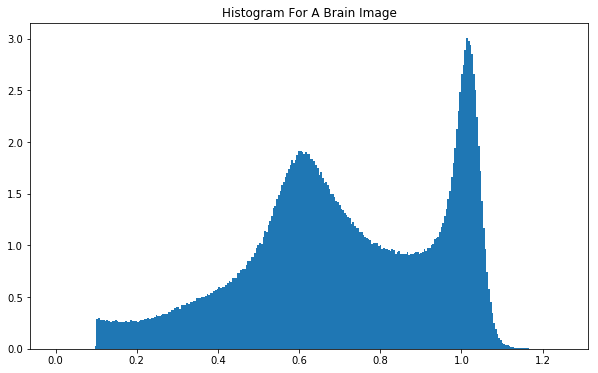

In [36]:
plt.figure(figsize=(10,6))
temp = plt.hist(data[data>0], density=True,bins=np.linspace(0,1.25,300))
plt.title('Histogram For A Brain Image')

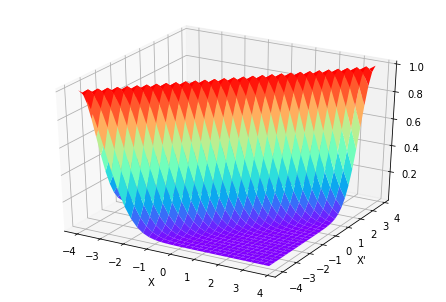

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.e**(-((X-Y)**2)/2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.xlabel('X')
plt.ylabel("X'")
plt.show()



In [6]:
Z

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])